In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(x_train,y_train) , (x_test,y_test) = keras.datasets.mnist.load_data()

In [5]:
len(x_train)

60000

In [7]:
len(x_test)

10000

In [10]:
x_train[0].shape

(28, 28)

In [11]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

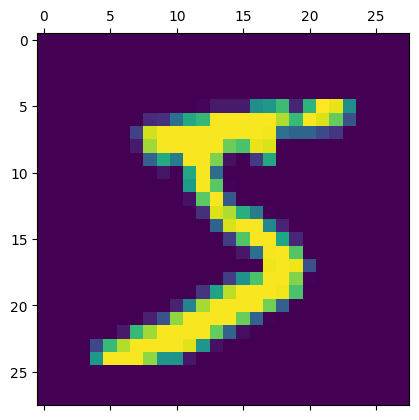

In [12]:
plt.matshow(x_train[0])

In [15]:
x_train[:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [17]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [18]:
x_train.shape

(60000, 28, 28)

In [4]:
# I dont need 3 cols in x_train 
x_train_flattend = x_train.reshape(len(x_train),28*28)
x_test_flattend = x_test.reshape(len(x_test),28*28)
x_test_flattend

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [34]:
x_train_flattend[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [5]:
#constructing our neural network using keras
#here 10 is output (0,1,2,...9) and 784 are input features (28*28 pixels for each digit from 0 to 9)
#Dense is used to create densly populated neural network

model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattend,y_train,epochs=5)

C:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3428 - loss: 18.1196
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3473 - loss: 6.1593
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3393 - loss: 5.5211
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3252 - loss: 5.5769
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3215 - loss: 5.3057


In [6]:
# since the accuracy is 41% we need to scale the data b/w 0 to 1 (instead of 0 to 255) .
x_train = x_train/255
x_test = x_test/255

In [40]:
x_train[255]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
# I dont need 3 cols in x_train 
x_train_flattend = x_train.reshape(len(x_train),28*28)
x_test_flattend = x_test.reshape(len(x_test),28*28)
x_train_flattend

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattend,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8031 - loss: 0.7476
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9134 - loss: 0.3063
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9209 - loss: 0.2853
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9239 - loss: 0.2722
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9274 - loss: 0.2609


In [10]:
#since we are aiming for a target of 0.9 (90%) to 1 (100%) , weh have achieved a target of 0.92 (92%)
#Now we are aiming for test_dataset

model.evaluate(x_test_flattend , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9138 - loss: 0.3033


[0.2671356797218323, 0.9251999855041504]

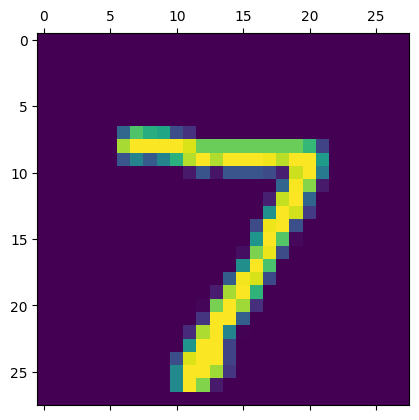

In [46]:
plt.matshow(x_test[0])

In [ ]:
y_predicted = model.predict(x_test_flattend)
y_predicted[0]

In [48]:
#above are the output neurons with prediction scores .
# we need to find the neuron with digit wich has the max score (and it should be 7 as x_test[0])

np.argmax(y_predicted[0])

np.int64(7)

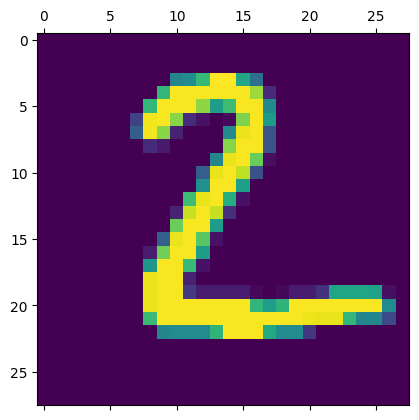

In [49]:
#test with another image
plt.matshow(x_test[1])

In [13]:
y_predicted = model.predict(x_test_flattend)
y_predicted[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([3.8744634e-01, 6.8712900e-03, 9.9902481e-01, 4.4392726e-01,
       6.1678129e-10, 8.8158607e-01, 8.2335842e-01, 1.4276629e-12,
       2.4893482e-01, 3.7088279e-09], dtype=float32)

In [14]:
np.argmax(y_predicted[1])

np.int64(2)

In [15]:
y_predicted_lbls = [np.argmax(i) for i in y_predicted]
y_predicted_lbls[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [18]:
conf_mat = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_lbls)
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    0,    2,    0,    5,    6,    2,    4,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   5,   14,  911,   17,    6,    6,   14,   10,   44,    5],
       [   3,    0,   15,  919,    0,   26,    2,   10,   27,    8],
       [   1,    1,    2,    2,  911,    0,   12,    4,    9,   40],
       [   7,    3,    1,   35,    7,  781,   12,    4,   35,    7],
       [   8,    3,    3,    2,    8,   15,  914,    2,    3,    0],
       [   1,    5,   20,   10,    9,    1,    0,  937,    3,   42],
       [   5,    9,    5,   18,    9,   23,    8,    9,  880,    8],
       [  10,    7,    1,   10,   26,    6,    0,   13,    9,  927]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

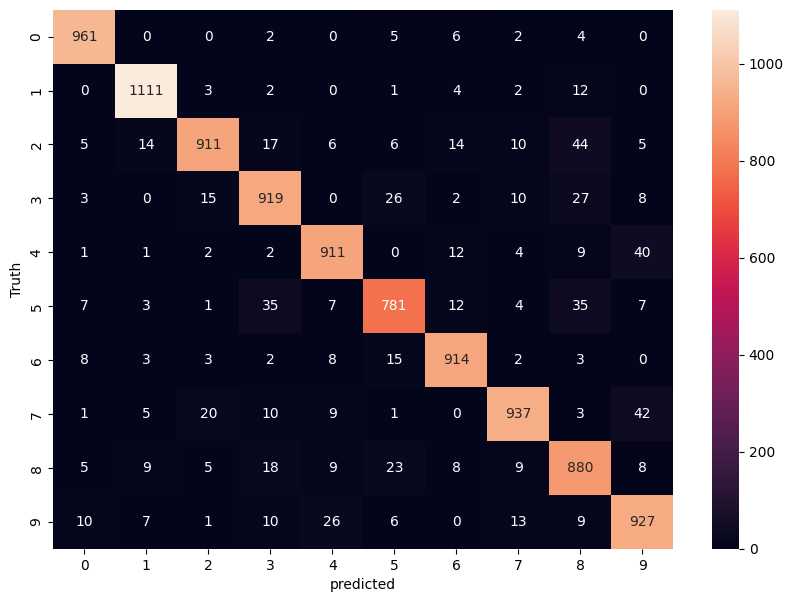

In [21]:
#since confusion matrix is hard to understand in arryay format , lets vizualize it with seaborn library

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')


In [25]:
#lets create some hidden layers to improve some performance

model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattend,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8741 - loss: 0.4541
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9624 - loss: 0.1292
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9746 - loss: 0.0849
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9809 - loss: 0.0620
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9849 - loss: 0.0494


Text(95.72222222222221, 0.5, 'Truth')

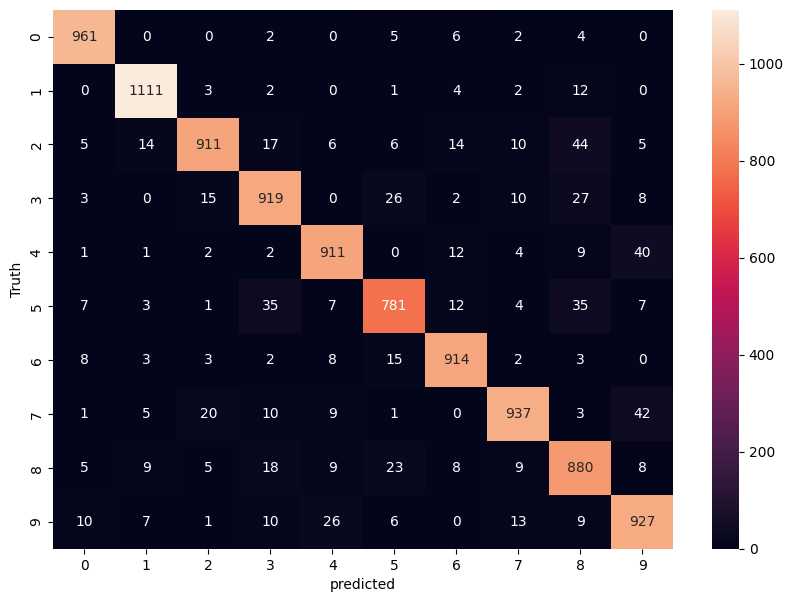

In [26]:
#vizualize and test it again

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')